# Customer_Segmentation - Data Wrangling 
##### Lindsey Robertson

### Problem

Customer segmentation for the purpose of Customer Lifetime Value prediction and more targeted marketing efforts. 

### Data

This real-world customer dataset with 31 variables describes
83,590 instances (customers) from a hotel in Lisbon, Portugal.
Instances include; customer personal, behavioral,
demographic, and geographical information for 3 full years.
The dataset can be found on Kaggle here

### Process

### Import libraries

In [ ]:
pip install openpyxl

In [ ]:
pip install kaggle

In [ ]:
pip install opendatasets

In [2]:
import pandas as pd
import numpy as np
import opendatasets as od
from numpy import NaN

### Load Flatfile Data

data = pd.read_excel('C:/Users/Lindsey/Repos/Customer_Segmentation/data/raw/HotelCustomersDataset.xlsx')

### Load data from Kaggle API

In [3]:
od.download(
    "https://www.kaggle.com/datasets/nantonio/a-hotels-customers-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading a-hotels-customers-dataset.zip to .\a-hotels-customers-dataset


100%|██████████| 15.6M/15.6M [00:01<00:00, 8.41MB/s]


### Read data into dataframe

In [12]:
file =('a-hotels-customers-dataset/\HotelCustomersDataset.xlsx')
Data = pd.read_excel(file)

 
# displaying the contents of the XLSX file
Data.head()


,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


How much data do we have?

In [15]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

### Duplicates

Are all entries for uniques customers?

In [19]:
Data['ID'].nunique()



83590

Yes, all instances in the data are from unique customers. Good news. 

What do the unique values look like for the rest of the features?

In [24]:
print(Data.nunique())

ID                      83590
Nationality               188
Age                       105
DaysSinceCreation        1095
NameHash                80642
DocIDHash               76993
AverageLeadTime           418
LodgingRevenue          10257
OtherRevenue             4490
BookingsCanceled            6
BookingsNoShowed            4
BookingsCheckedIn          29
PersonsNights              56
RoomNights                 48
DaysSinceLastStay        1105
DaysSinceFirstStay       1108
DistributionChannel         4
MarketSegment               7
SRHighFloor                 2
SRLowFloor                  2
SRAccessibleRoom            2
SRMediumFloor               2
SRBathtub                   2
SRShower                    2
SRCrib                      2
SRKingSizeBed               2
SRTwinBed                   2
SRNearElevator              2
SRAwayFromElevator          2
SRNoAlcoholInMiniBar        2
SRQuietRoom                 2
dtype: int64


**Quesitons from observation:
Why is there a different amoutn of NameHash vs IDs? The NameHash is the name of the customer's hash string. I don't fully understand this field but I believe the NameHash is standardized name processing. Since there are no missing values in the field, could this mean that some customers have created more than one customer ID or account somehow?

Check for duplicates in dataframe

In [30]:
Data.duplicated().sum()

0

We have confirmed we do not need to worry abou dupliate instances in our dataset. 

### Validity checks on relevant numerical features

#### Age

In [43]:
wrong_ages = Data['Age'].between(0, 110,inclusive=True).any()

print(wrong_ages)

True


C:\Users\Lindsey\AppData\Local\Temp\ipykernel_9712\1070877684.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  wrong_ages = Data['Age'].between(0, 110,inclusive=True).any()


Select row where age column contains any value under 1 and over 110.

In [49]:
agefilter1 = ((Data['Age']>=110) & (Data['Age']<=1)).sum()
#sub_df = Data.loc[: , filter]
print(agefilter1)

0


No ages in the dataset that are impossible. What about logical? How old do you need to be to book a hotel? I will go with 16 to be liberal. 

In [50]:
agefilter2 = ((Data['Age']>=110) & (Data['Age']<=16)).sum()
print(agefilter2)

0


This is good to know that no children are booking rooms. 

#### Revenues

Making sure all reported revenues are positive. 

In [71]:
revenuefilter1 = ((Data['LodgingRevenue']<=0)).sum()
print(revenuefilter1)

20408


In [52]:
revenuefilter2 = ((Data['OtherRevenue']<=0)).sum()
print(revenuefilter2)

20214


Seems like lots of instances where revenue was less than or equal to 0! That's not good for business. How many of these are impossible, or negative values?

In [68]:
x = Data.LodgingRevenue.any()
if x < 0:
    print(x)
else:
    print('okay')


okay


In [74]:
x = Data.OtherRevenue.any()
if x < 0:
    print(x)
else:
    print('okay')

okay


We are free of negative revenues. 

**Quesitons from obeservation:
  Why do we have so many zero revenue instances?

#### Bookings, Nights, Rooms, Days

We saw earlier that each of these features is in the correct int datatype. Duplicates are likely and not an issue. No missing values, see below.

### Find the missing values from each column

In [13]:
print(Data.isnull().sum())

ID                         0
Nationality                0
Age                     3779
DaysSinceCreation          0
NameHash                   0
DocIDHash                  0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64


We are  missing about 5% of the ages in our data to impute. All other columns are free of missing values. Thankfully!

### Handle missing values

Mark all missing values as null (NaN)

In [29]:
print(Data['Age'].fillna(NaN))

0        51.0
1         NaN
2        31.0
3        60.0
4        51.0
         ... 
83585    54.0
83586    47.0
83587    53.0
83588    85.0
83589    13.0
Name: Age, Length: 83590, dtype: float64


#### Age validation round2

<AxesSubplot:>

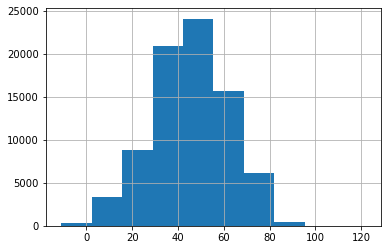

In [77]:
Data.Age.hist()

Indeed somehow we included instances with ages under 16.

In [83]:
Data.loc[Data['Age'] < 16]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
34,35,PRT,3.0,1095,0x11DFD4644A50FAB1514696B6756D327D943E029BAB84...,0xA2454B19BC40F4CD058267AA604BF78FE57AC373AD7B...,0,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
67,68,FRA,13.0,1095,0x0A5D1532BFB2FDCBF7861FCC86D0F57199A07BE246E5...,0x8BDF50DFBCB267507E268A26F639952FBAFEBC436B06...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
81,82,ESP,3.0,1094,0x5F699924994B56CCD818C485770CFE10C8631BAAD16F...,0x6B002A25A6614C137832DFE5B4A1D720CBFD6B3392DC...,103,653.4,759.6,0,...,0,0,0,1,1,0,0,0,0,0
87,88,ESP,6.0,1094,0x362DF374CD818975425F9E52D0A2936D54C3429A8804...,0x1ECB32E15890127DF2B091FDC11F43C8A75A0866F5E6...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
110,111,FRA,13.0,1094,0x4671E4FFAFE9E6E1AA1A9DEAC487E7A6B09AD3483809...,0xC4C88B1D2B45D18AEEA0A2D45B1BF950875FF059272E...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83574,83575,FRA,3.0,0,0x7A07F413A66AFD26910FEEC82AF0365F7EF7CF4C2B4C...,0xACAE92FC1805757D6021EE4379B8858D09ED3A3E2BBA...,93,358.0,108.0,0,...,0,0,0,0,0,0,0,0,0,0
83575,83576,FRA,9.0,0,0xAC9A34E59DF0DD01CA27920639109410290A47F8D513...,0xE71C5AA233346E85E03229F9E18787342033F5BE39CF...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
83576,83577,FRA,6.0,0,0xACD872C2F1DC0C07395155351ECC1F19E59BD641F681...,0x28434C1272AA61521DB0E62A836E6C479508883E3F08...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
83578,83579,PRT,5.0,0,0xB2BDA5A097995D0F49B2640CF694BC7EE0A35B98D3ED...,0xCD2911DAE13DFBB5DA7937227560F722C9D309FFA07D...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


This is a lot of questionable ages missed in the first round of validation. What do we do with them? 

In [84]:
weird_age = Data.loc[Data['Age'] < 16]

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

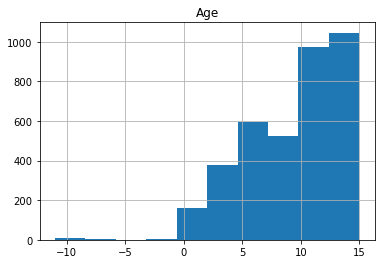

In [86]:
weird_age.hist('Age')

In [87]:
wrong_age = Data.loc[Data['Age'] < 1]

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

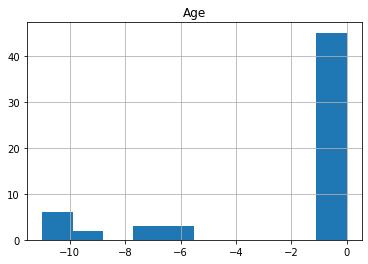

In [92]:
wrong_age.hist('Age')

We need to impute these ages with NaN/ "Not Known" or with mulitvariate interpolation, or regression. Coud these negative values be errors?

## Outliers

Are there any other extreme values?

In [89]:
Data.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,83590.000000,79811.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,...,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000
mean,41795.500000,45.398028,453.640902,66.196028,298.802087,67.589132,0.002022,0.000634,0.794617,4.649133,...,0.000873,0.002847,0.001711,0.013219,0.352686,0.142541,0.000335,0.003505,0.000120,0.088372
std,24130.498838,16.572368,313.390291,87.758990,372.851892,114.327776,0.066770,0.029545,0.695778,4.567673,...,0.029539,0.053284,0.041326,0.114213,0.477809,0.349606,0.018299,0.059101,0.010937,0.283837
min,1.000000,-11.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20898.250000,34.000000,177.000000,0.000000,59.000000,2.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41795.500000,46.000000,397.000000,29.000000,234.000000,38.500000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62692.750000,57.000000,723.000000,103.000000,402.000000,87.675000,0.000000,0.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
